In [1]:
import heapq
import time
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
def dijkstra(graph, source):
    """
    graph: dict node -> list of (neighbor, weight)
    returns: dist dict, parent dict
    """
    INF = float("inf")
    dist = {v: INF for v in graph}
    parent = {v: None for v in graph}
    dist[source] = 0
    pq = [(0, source)]
    while pq:
        d, node = heapq.heappop(pq)
        if d > dist[node]:
            continue
        for nei, w in graph[node]:
            nd = d + w
            if nd < dist[nei]:
                dist[nei] = nd
                parent[nei] = node
                heapq.heappush(pq, (nd, nei))
    return dist, parent

def reconstruct_path(parent, source, target):
    path = []
    cur = target
    while cur is not None:
        path.append(cur)
        if cur == source:
            break
        cur = parent[cur]
    path.reverse()
    if path and path[0] == source:
        return path
    return None

In [3]:
graph3 = {
    "S": [("A", 2), ("B", 5)],
    "A": [("S", 2), ("B", 1), ("C", 3)],
    "B": [("S", 5), ("A", 1), ("C", 1), ("D", 7)],
    "C": [("A", 3), ("B", 1), ("D", 2)],
    "D": [("B", 7), ("C", 2)]
}

dist3, parent3 = dijkstra(graph3, "S")
path3 = reconstruct_path(parent3, "S", "D")
print("Distances from S:", dist3)
print("Shortest path S -> D:", path3)

Distances from S: {'S': 0, 'A': 2, 'B': 3, 'C': 4, 'D': 6}
Shortest path S -> D: ['S', 'A', 'B', 'C', 'D']


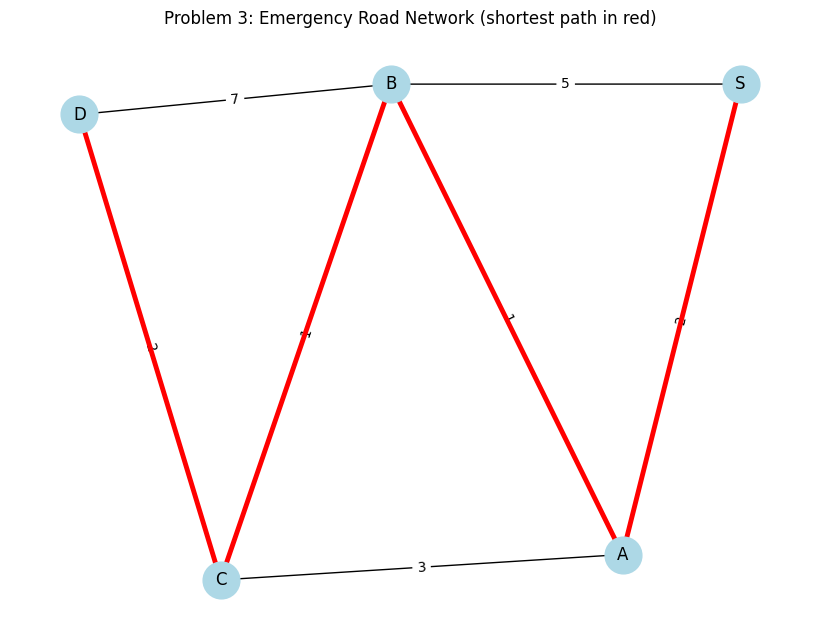

In [4]:
G3 = nx.Graph()
for u, nbrs in graph3.items():
    for v, w in nbrs:
        G3.add_edge(u, v, weight=w)

pos = nx.spring_layout(G3, seed=3)
plt.figure()
nx.draw(G3, pos, with_labels=True, node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G3, 'weight')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=edge_labels)
if path3:
    nx.draw_networkx_edges(G3, pos, edgelist=list(zip(path3, path3[1:])), width=3.5, edge_color='red')
plt.title("Problem 3: Emergency Road Network (shortest path in red)")
plt.show()

In [5]:
print("\nTime Complexity:")
print("- Dijkstra (binary heap): O(E log V)")
print("- Space: O(V + E)")
print("- Note: Dijkstra requires non-negative edge weights.")


Time Complexity:
- Dijkstra (binary heap): O(E log V)
- Space: O(V + E)
- Note: Dijkstra requires non-negative edge weights.
